<a href="https://colab.research.google.com/github/cyrusfrog/Therapix/blob/main/Therapix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json
import pickle
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers

In [ ]:
#load the json file
with open('intents.json') as file:
    data = json.load(file)


In [ ]:
training_sentences = []
training_labels = []
labels = []
responses = []

for intent in data['intents']:
    for pattern in intent['patterns']:
        training_sentences.append(pattern)
        training_labels.append(intent['tag'])
    responses.append(intent['responses'])

    if intent['tag'] not in labels:
        labels.append(intent['tag'])


In [ ]:
num_classes = len(labels)

lbl_encoder = LabelEncoder()
lbl_encoder.fit(training_labels)
training_labels = lbl_encoder.transform(training_labels)



In [ ]:
#text-preprocessing
vocab_size = 1000
embedding_dim = 16
max_len = 20
oov_token = "<OOV>"

tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_token)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded_sequences = pad_sequences(sequences, truncating = 'post', maxlen = max_len)


In [ ]:
#model
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(GlobalAveragePooling1D())
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])


model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 16)            16000     
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 81)                1377      
                                                                 
Total params: 17,921
Trainable params: 17,921
Non-trainable params: 0
____________________________________________________

In [ ]:
epochs = 500
history = model.fit(padded_sequences, np.array(training_labels), epochs = epochs)

#save the trained model
model.save('chat-model')

#save the fitted tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol = pickle.HIGHEST_PROTOCOL)

#save the fitted label encoder
with open('label_encoder.pickle', 'wb') as ecn_file:
    pickle.dump(lbl_encoder, ecn_file, protocol = pickle.HIGHEST_PROTOCOL)

Epoch 1/500
8/8 [==============================] - 8s 249ms/step - loss: 4.3938 - accuracy: 0.0122
Epoch 2/500
8/8 [==============================] - 1s 127ms/step - loss: 4.3888 - accuracy: 0.0244
Epoch 3/500
8/8 [==============================] - 1s 167ms/step - loss: 4.3838 - accuracy: 0.0244
Epoch 4/500
8/8 [==============================] - 1s 83ms/step - loss: 4.3784 - accuracy: 0.0244
Epoch 5/500
8/8 [==============================] - 1s 56ms/step - loss: 4.3720 - accuracy: 0.0244
Epoch 6/500
8/8 [==============================] - 0s 57ms/step - loss: 4.3643 - accuracy: 0.0285
Epoch 7/500
8/8 [==============================] - 1s 83ms/step - loss: 4.3540 - accuracy: 0.0569
Epoch 8/500
8/8 [==============================] - 0s 56ms/step - loss: 4.3411 - accuracy: 0.0528
Epoch 9/500
8/8 [==============================] - 0s 58ms/step - loss: 4.3236 - accuracy: 0.0325
Epoch 10/500
8/8 [==============================] - 0s 29ms/step - loss: 4.3011 - accuracy: 0.0325
Epoch 11/500
8/8

In [ ]:
!pip install colorama

In [ ]:
import json
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder

import colorama
colorama.init()
from colorama import Fore, Style, Back

import random
import pickle


In [ ]:
with open('intents.json') as file:
    data = json.load(file)

In [ ]:
def chat():
    #load trained model
    model = keras.models.load_model('chat-model')

    #load tokenizer object
    with open('tokenizer.pickle', 'rb') as handle:
        tokenizer = pickle.load(handle)

    #load label encoder object
    with open('label_encoder.pickle', 'rb') as enc:
        lbl_encoder = pickle.load(enc)

    #parameters
    max_len = 20

    while True:
        print(Fore.LIGHTBLUE_EX + 'User: ' + Style.RESET_ALL, end = "")
        inp = input()
        if inp.lower() == 'quit':
            print(Fore.GREEN + 'Chatbot:' + Style.RESET_ALL, "Take care. See you soon.")
            break

        result = model.predict(keras.preprocessing.sequence.pad_sequences(tokenizer.texts_to_sequences([inp]), truncating = 'post', maxlen = max_len))
        tag = lbl_encoder.inverse_transform([np.argmax(result)])

        for i in data['intents']:
            if i['tag'] == tag:
                print(Fore.GREEN + 'Chatbot:' + Style.RESET_ALL, np.random.choice(i['responses']))


print(Fore.YELLOW + 'Start talking to the chatbot, your Personal Therapeutic AI Assistant. (Type quit to stop talking)' + Style.RESET_ALL)
chat()


Start talking to the chatbot, your Personal Therapeutic AI Assistant. (Type quit to stop talking)
User: hi
1/1 [==============================] - 0s 381ms/step
Chatbot: Hi there. How are you feeling today?
User: im not well
1/1 [==============================] - 0s 26ms/step
Chatbot: What do you think is causing this?
User: i feel stressed
1/1 [==============================] - 0s 23ms/step
Chatbot: Give yourself a break. Go easy on yourself. Do you want to talk about what's stressing you out?
User: i feel so anxious because of my exams
1/1 [==============================] - 0s 23ms/step
Chatbot: I see. Have you taken any approaches to not feel this way?
User: not really
1/1 [==============================] - 0s 20ms/step
Chatbot: Tell me more
User: i feel anxious about them
1/1 [==============================] - 0s 19ms/step
Chatbot: Don't let the little worries bring you down. What's the worse that can happen?
User: true. thank you so much for listening to me
1/1 [===================

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 16)            16000     
                                                                 
 bidirectional (Bidirectiona  (None, 20, 128)          41472     
 l)                                                              
                                                                 
 global_average_pooling1d_1   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_3 (Dense)             (None, 16)                2064      
                                                                 
Total params: 59,536
Trainable params: 59,536
Non-trainable params: 0
_________________________________________________________________


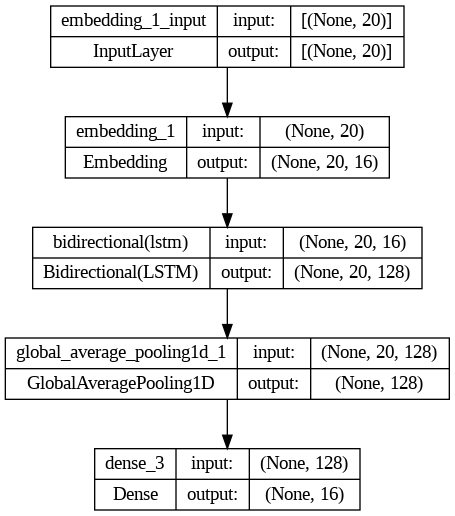

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)